# 1️⃣ Refined Business Understanding for the Hotel Discount Strategy

## Business Context
Hotels rely on reservations to generate revenue, but a major challenge they face is cancellations. Many guests take advantage of flexible booking policies, making reservations and later canceling, which leads to:

✅ Lost revenue (especially during peak seasons when canceled rooms could have been sold to other guests).

✅ Operational inefficiencies (difficulty in forecasting demand and staffing).

✅ Reduced profitability (offering discounts to guests who cancel leads to financial losses).

To increase guest loyalty and revenue, the hotel wants to strategically offer discounts only to guests who are highly likely to honor their reservations while avoiding losses from those who cancel.



# 2️⃣ Business Objective

The hotel’s goal is to maximize revenue and profitability by offering discounts to guests who will honor their bookings. Specifically, they aim to:

✅ Identify and reward reliable guests who are unlikely to cancel their reservations.

✅ Minimize financial losses by avoiding discounts for guests who are likely to cancel.

✅ Reduce false positives, ensuring that discounts only go to the most committed guests.

✅ Optimize occupancy rates, leading to better financial planning and staff allocation.

👉 Key Trade-off: The hotel is flexible with false negatives (missing some good guests) but not with false positives (giving discounts to canceling guests).

# 3️⃣ Key Metrics to Focus On
Since the hotel’s priority is avoiding false positives, the main evaluation metric is precision for class 1 (guests who honor their reservation).

## ✅ Primary Metric: Precision (for class 1)
- **Why?** Precision tells us how many of the guests we predict will honor their reservation actually do.
- **Goal:** A high precision score ensures that only reliable guests receive discounts, minimizing financial losses.
- **How?** By increasing the probability threshold (e.g., 85% or 90%), we reduce false positives, making our discount strategy more effective.

## ❌ De-emphasized Metric: Recall
- Why? Recall measures how many of the guests who honored their reservations we successfully identified.
- Trade-off: Since false negatives are acceptable, we are okay with missing rewarding of some good guests as long as we minimize false positives.
## 📊 Other Supporting Metrics
- Confusion Matrix → Helps visualize the balance between false positives and false negatives.
- F1-score → Can help track overall model performance (but precision is our top focus).

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px 
import warnings
#from ydata_profiling import ProfileReport

pd.set_option("display.max_columns", 75)


# Load Data 

In [2]:
df = pd.read_csv(r"/home/western/Documents/data/hotel_bookings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [3]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [4]:
df.tail()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17
119389,119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-17


In [5]:
df.shape

(119390, 33)

In [6]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Observations
- From the initial observations data looks consistent at the top and tail end except for the missing values
- The adr (average daily rate) for each room cannot be negative (sort that during data cleaning)

# Data Cleaning 

In [7]:
df.duplicated().sum()

0

### Observations
- The dataset does not contain duplicates 

## Class imbalance 

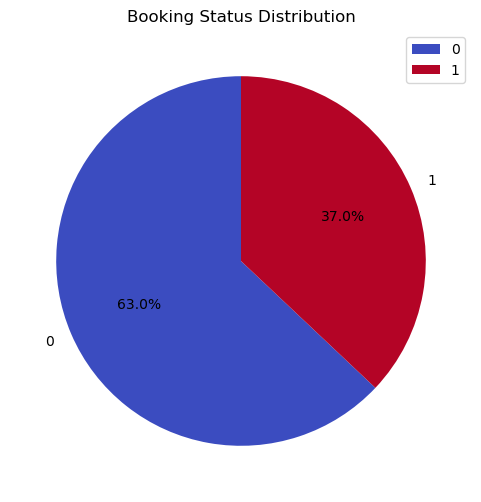

In [8]:
# Count occurrences of each category in 'booking_status'
booking = df['is_canceled'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(6, 6))  # Set figure size
booking.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', legend=True)

# Customize labels and title
plt.ylabel('')  # Remove y-axis label for clarity
plt.title('Booking Status Distribution')

# Show the plot
plt.show()

### Observations
- There is a case of class imbalance in our dataset
- We'll wait and see the impact when modeling
- The overal cancellation rate is 37%

## Missing values

In [9]:
df.isnull().sum()[10:]

adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

### Observations 
- Columns country, company, agent, and children have missing values 

### Correcting inconsistencies in adr feature 

In [10]:
# Replace NaN with 0
df['adr'] = df['adr'].fillna(0)

# Replace 0 with NaN so median will not consider them
df['adr'] = df['adr'].replace(0, np.nan)

# Calculate the median of 'adr', excluding NaN values
adr_median = df['adr'].median()

# Impute NaN values with the median
df['adr'] = df['adr'].fillna(adr_median)

In [11]:
 df['adr'] = df['adr'].abs()

#### Key changes  
- Replaced 0 with NaN and filled with median values 
- Made sure we have positive values in adr feature

### Filing NaN values in feature children with median value

In [12]:
# Calculate the median of 'adr', excluding NaN values
children_median = df['children'].median()

# Impute NaN values with the median
df['children'] = df['children'].fillna(children_median)

In [13]:
df.isnull().sum()[10:]

adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [14]:
total_records = len(df)
# Missing values 
missing_values = df.isnull().sum()

# Percent missing values 
percent_missing_values = (missing_values/ total_records) * 100

# Use a DataFrame 
missing_values_df = pd.DataFrame({
    'missing_values': missing_values,
    'percentage (%)': percent_missing_values
})

print(f"Total records: {total_records}")
# Slice to only the missing values 
missing_values_df.iloc[10:]

Total records: 119390


,missing_values,percentage (%)
adults,0,0.000000
children,0,0.000000
babies,0,0.000000
meal,0,0.000000
country,488,0.408744
market_segment,0,0.000000
distribution_channel,0,0.000000
is_repeated_guest,0,0.000000
previous_cancellations,0,0.000000
previous_bookings_not_canceled,0,0.000000


## Analyzing categorical features eith mising values 

In [15]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [16]:
df = df.drop(columns=["agent", "company", "index", "country"], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Key changes 
- I dropped columns `agent`, `company`, `index`, `country`
- Company because it had almost 97% of missing values 
- Agent and country as it will be better suited for EDA (Finding the best agent and country with most guests) other than ML case. These columns would increase dimensionality as using label encoder would result in bias.
- Index columns is a unique values identifier columns and won't contribute much to the ML model

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Feature Engineering 

## Total Stay duration
- `total_booking_days` will be the feature summing up total number of stay duration for each guest

In [18]:
df['total_booking_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_booking_days
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,95.0,0,0,Check-Out,01-07-15,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,95.0,0,0,Check-Out,01-07-15,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-15,2


## Total guests 
- This will be the total of all guests  

In [19]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_booking_days,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,95.0,0,0,Check-Out,01-07-15,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,95.0,0,0,Check-Out,01-07-15,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-15,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-15,2,2.0


In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_booking_days,total_guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,103.390027,0.062518,0.571363,3.427900,1.968239
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,48.806046,0.245291,0.792798,2.557439,0.722394
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.230000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


### Drop irrelevant columns 
- These colums will not contribute to the objectives of the model
- Some columns were dropped after feature engineering
- Some columns were dropped after the modeling as their contribution was insignificant 


In [21]:
df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
                     'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                     'adults', 'children', 'babies', 'reservation_status_date',
                      
                      'customer_activity_score', 'previous_cancellations', 'days_in_waiting_list',
                      'previous_bookings_not_canceled', 'is_repeated_guest'
                     
                     
                     
                     ],
             errors='ignore' )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   meal                         119390 non-null  object 
 4   market_segment               119390 non-null  object 
 5   distribution_channel         119390 non-null  object 
 6   reserved_room_type           119390 non-null  object 
 7   assigned_room_type           119390 non-null  object 
 8   booking_changes              119390 non-null  int64  
 9   deposit_type                 119390 non-null  object 
 10  customer_type                119390 non-null  object 
 11  adr                          119390 non-null  float64
 12  required_car_parking_spaces  119390 non-null  int64  
 13 

## Outlier detection 

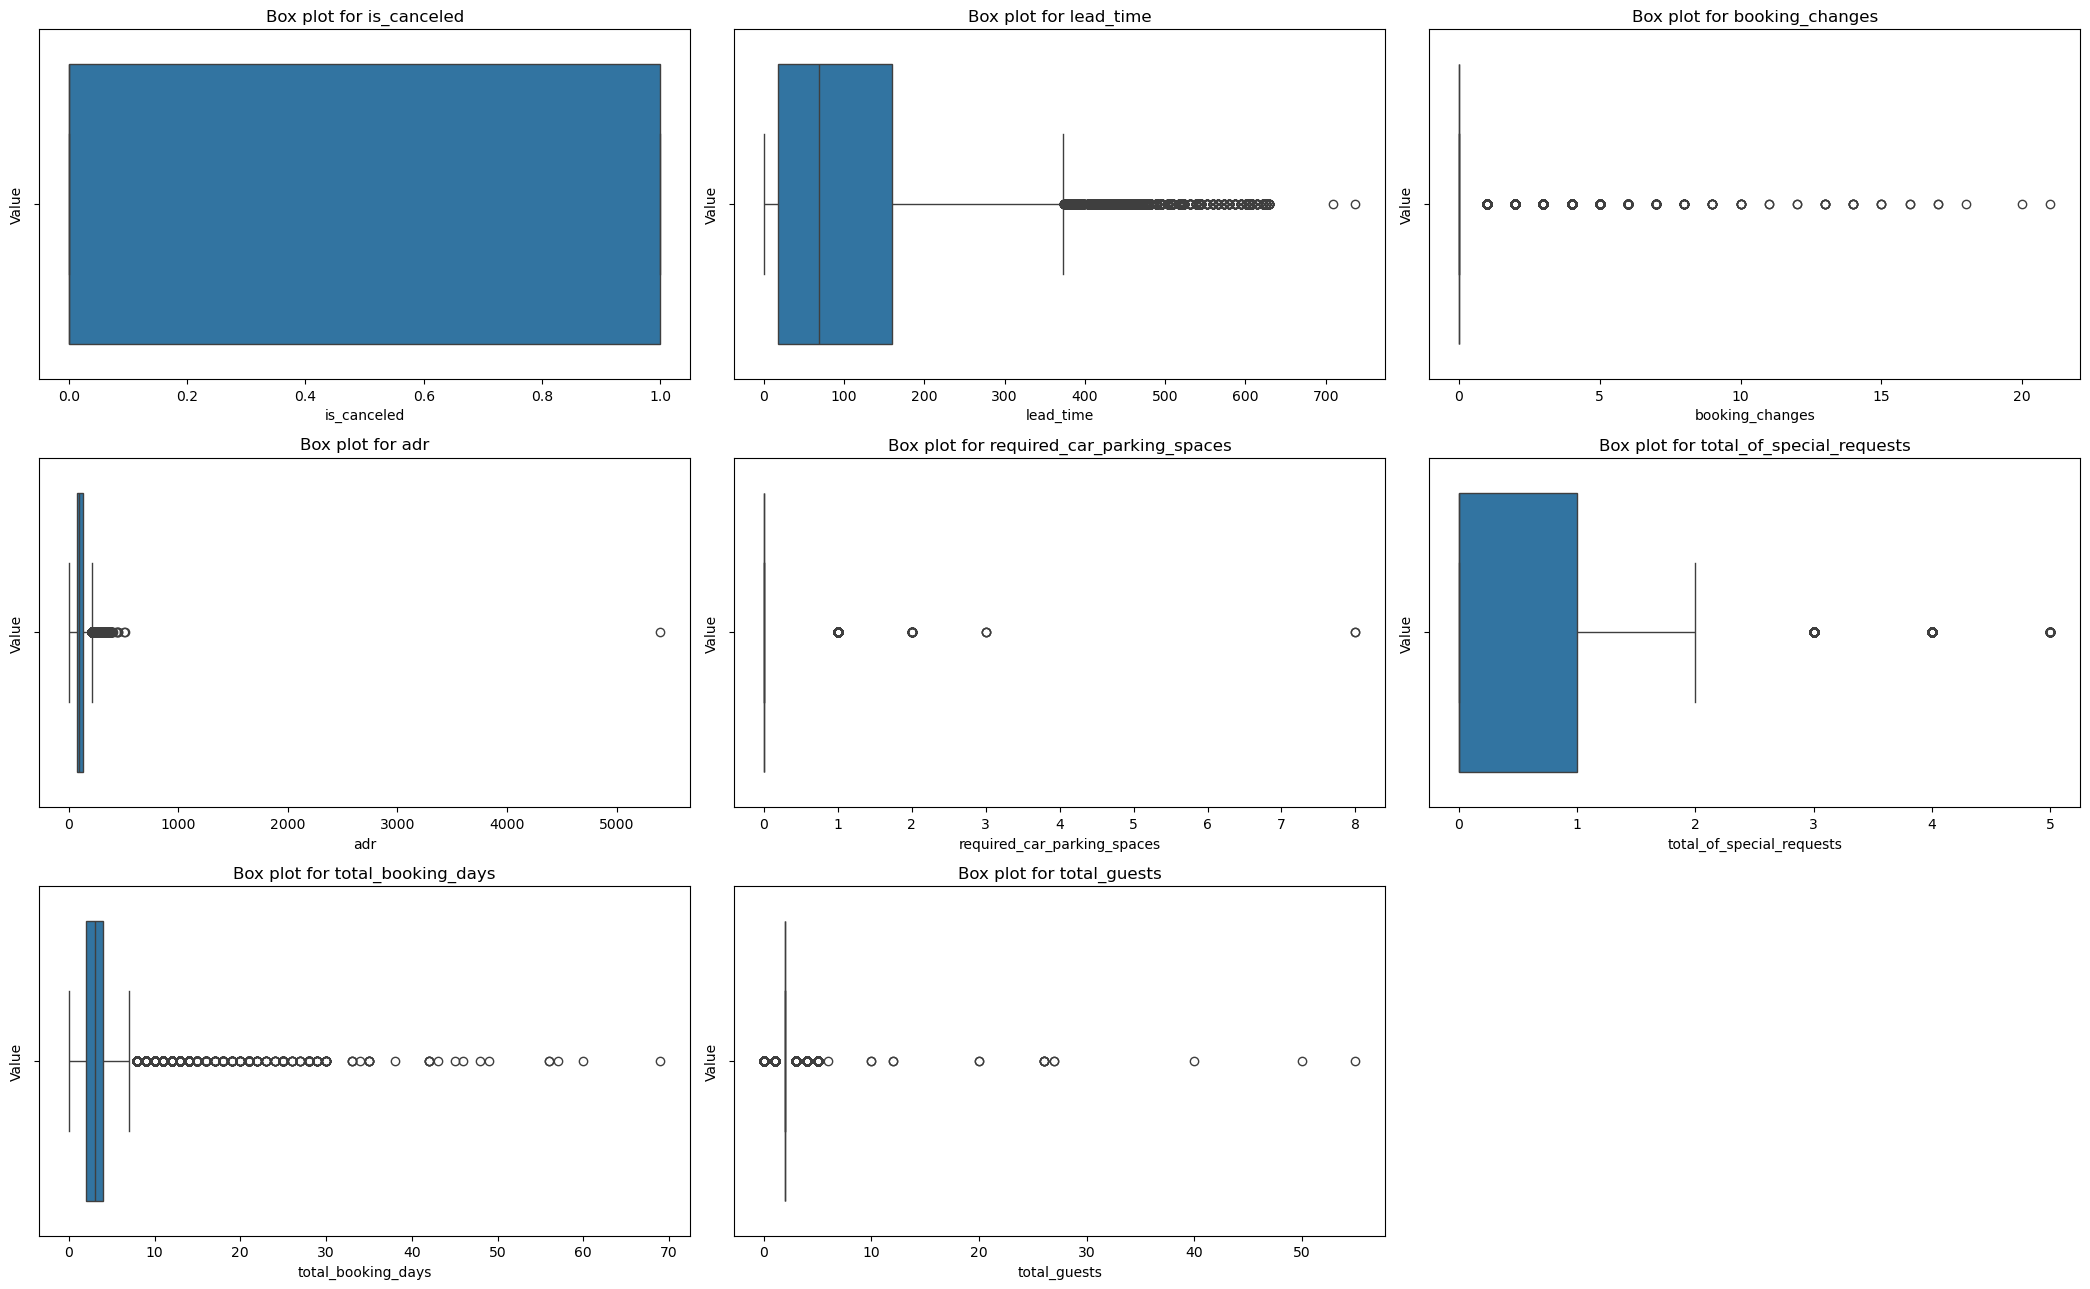

In [22]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

#### Key observations 
- There are outliers and we need to drop them to prevent skewing the model  

### Using IQR to remove outliers  

In [23]:
# Create a copy of the data
data_copy = df.copy()

# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.5)  # .25
q3 = numeric_data.quantile(0.95)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 119390
Number of rows after removing outliers: 116162
Number of rows removed: 3228


### Key observation 
- Number of rows before removing outliers: 119390
- Number of rows after removing outliers: 116162
- Number of rows removed: 3228

## Check for the distribution of the numeric columns 

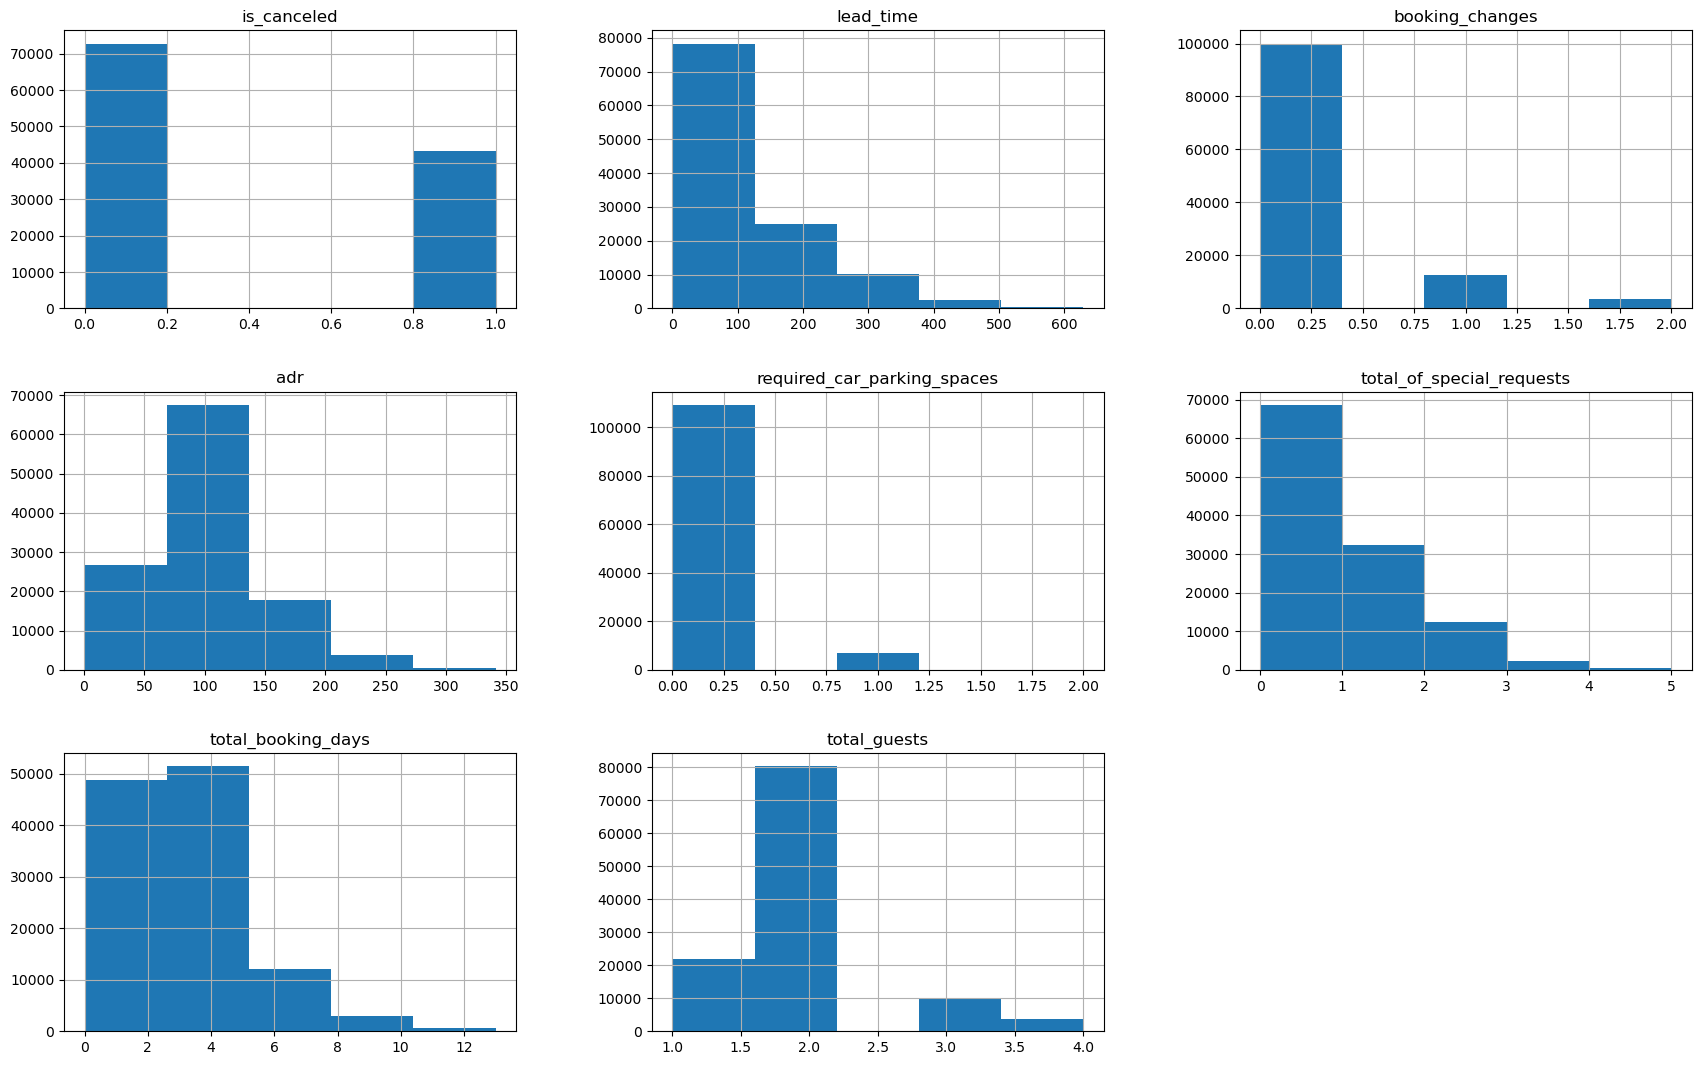

In [24]:
df.hist(bins=5, figsize=(21,13));

### Observations 
- Most of these columns are asymmetric 

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Apply log transformation safely using np.log1p (handles zero values)
# log_cols = [
#     "lead_time", "booking_changes", "adr", 
#     "total_of_special_requests", "total_booking_days", "total_guests"
# ]

# for col in log_cols:
#     df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x), avoids log(0) issues

# # Plot distributions
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjust layout
# axes = axes.flatten()  # Flatten for easy iteration

# for i, col in enumerate(log_cols):
#     sns.histplot(df[col], ax=axes[i], kde=True)
#     axes[i].set_title(f"Distribution of {col} (Log Transformed)")

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


### Further analysis of the categorical columns 

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols


Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [27]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [28]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [29]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [30]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [31]:
df['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [32]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

In [33]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [34]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [35]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

### What to do 
- label encode these columns `'hotel', 'reserved_room_type', 'assigned_room_type'` because of inherent hierarchical structure for reserved and assigned rooms. Hotel has two categorical values and binary encoding would suffice
- Use one hot encoding for `'meal', 'market_segment', 'distribution_channel',
       'deposit_type',  'customer_type', 'reservation_status'`

- 

### Lets save a copy first of the clean dataset 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116162 entries, 2 to 119389
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        116162 non-null  object 
 1   is_canceled                  116162 non-null  int64  
 2   lead_time                    116162 non-null  int64  
 3   meal                         116162 non-null  object 
 4   market_segment               116162 non-null  object 
 5   distribution_channel         116162 non-null  object 
 6   reserved_room_type           116162 non-null  object 
 7   assigned_room_type           116162 non-null  object 
 8   booking_changes              116162 non-null  int64  
 9   deposit_type                 116162 non-null  object 
 10  customer_type                116162 non-null  object 
 11  adr                          116162 non-null  float64
 12  required_car_parking_spaces  116162 non-null  int64  
 13  tota

In [37]:
data = df.copy()

In [38]:
data.to_csv("/home/western/Documents/data/cleaned_hotel_dataset.csv", index=False)

# Modeling 

In [39]:
# Classification algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import collections

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc


### Label encoding 

In [40]:
# Define categorical columns to encode
categorical_columns = ['hotel', 'reserved_room_type', 'assigned_room_type']


# Initialize a dictionary to store LabelEncoders (for potential inverse transformation)
label_encoders = {}

# Loop through categorical columns and apply Label Encoding (overwrite existing column)
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()  # Initialize LabelEncoder
    df[col] = label_encoders[col].fit_transform(df[col])  # Overwrite original column

# Display the modified DataFrame
df.head()

,hotel,is_canceled,lead_time,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_booking_days,total_guests
2,1,0,7,BB,Direct,Direct,0,2,0,No Deposit,Transient,75.0,0,0,Check-Out,1,1.0
3,1,0,13,BB,Corporate,Corporate,0,0,0,No Deposit,Transient,75.0,0,0,Check-Out,1,1.0
4,1,0,14,BB,Online TA,TA/TO,0,0,0,No Deposit,Transient,98.0,0,1,Check-Out,2,2.0
5,1,0,14,BB,Online TA,TA/TO,0,0,0,No Deposit,Transient,98.0,0,1,Check-Out,2,2.0
6,1,0,0,BB,Direct,Direct,2,2,0,No Deposit,Transient,107.0,0,0,Check-Out,2,2.0


### One hot encoding

In [41]:
categorical_columns = ['meal', 'market_segment', 'distribution_channel', 'deposit_type',  'customer_type',
                       'reservation_status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Loop through categorical columns and apply encoding
encoded_dfs = []  

for col in categorical_columns:
    encoded_array = encoder.fit_transform(df[[col]])  # Fit & transform column
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([col]))  # Convert to DataFrame
    encoded_dfs.append(encoded_df)  # Store in list

# Concatenate all encoded columns and drop original categorical columns
df_encoded = pd.concat([df.drop(columns=categorical_columns)] + encoded_dfs, axis=1)

# Display the final encoded DataFrame
df = df_encoded.copy()
df.head()

,hotel,is_canceled,lead_time,reserved_room_type,assigned_room_type,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_booking_days,total_guests,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
2,1.0,0.0,7.0,0.0,2.0,0.0,75.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,13.0,0.0,0.0,0.0,75.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,14.0,0.0,0.0,0.0,98.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,14.0,0.0,0.0,0.0,98.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,2.0,2.0,0.0,107.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Define the features and target variable 

In [42]:
df = df.dropna()

# Defining the dependent variables/features
X = df.drop(columns=['is_canceled'])

# Target variable 
y = df['is_canceled']

### Split data to train val and test sets 

In [43]:
# Split into training and temporary sets (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=112)

# Split the temporary set into validation and test sets (50% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=122)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Decision Tree Classifier 

In [44]:
lg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lg_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = lg_model.predict(X_val_scaled)

#### Predict on Validation set

In [45]:
# Print the classification report
print('Classification Report on Training Set:')
print(classification_report(y_val, y_val_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_val, y_val_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     10447
         1.0       0.86      0.81      0.83      6506

    accuracy                           0.88     16953
   macro avg       0.87      0.86      0.87     16953
weighted avg       0.87      0.88      0.87     16953

Confusion Matrix on testing Set:
[[9596  851]
 [1261 5245]]


#### Predict on testing set 

In [46]:
y_test_pred = lg_model.predict(X_test_scaled)
# Print the classification report
print('Classification Report on Testing Set:')
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Testing Set:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     10447
         1.0       0.85      0.80      0.82      6507

    accuracy                           0.87     16954
   macro avg       0.87      0.86      0.86     16954
weighted avg       0.87      0.87      0.87     16954

Confusion Matrix on testing Set:
[[9529  918]
 [1297 5210]]


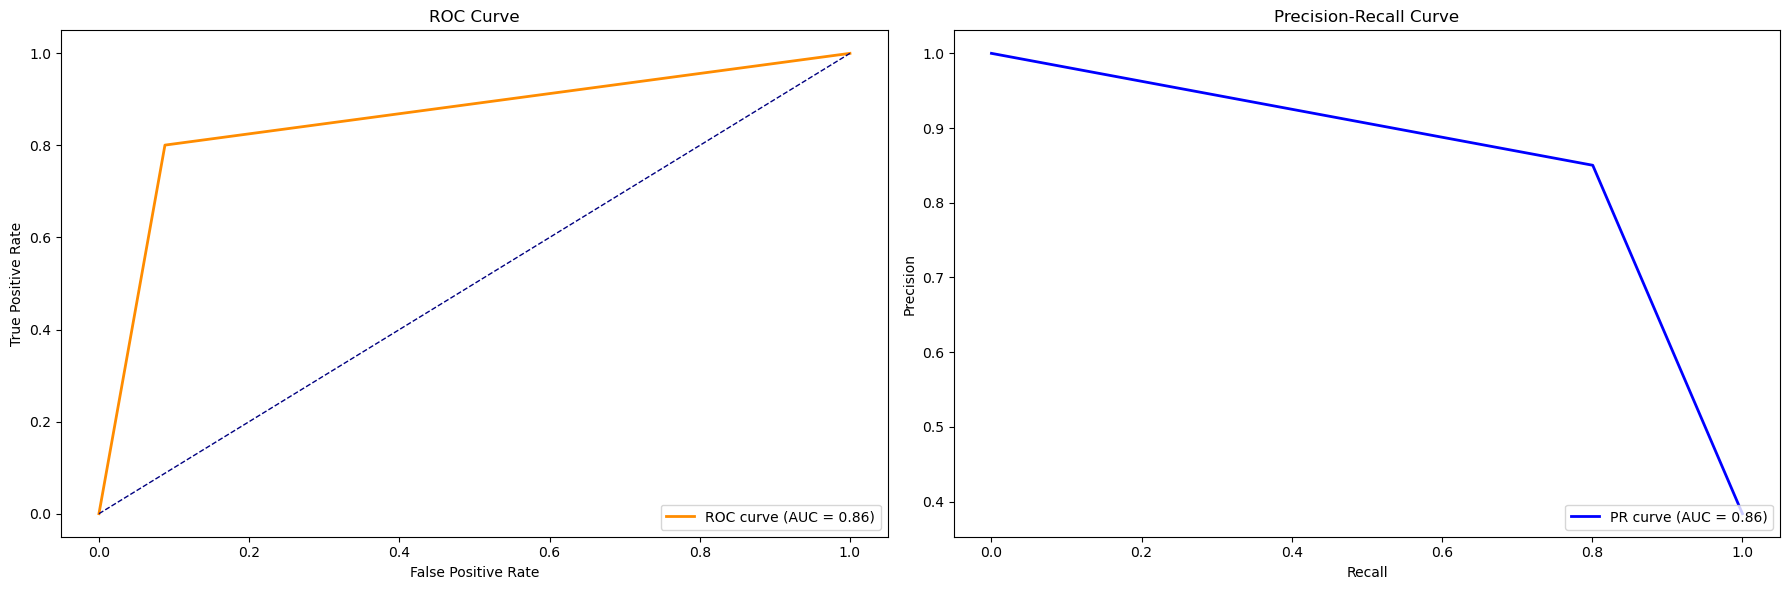

In [47]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()

## Decision Tree 

In [48]:
dt_model = DecisionTreeClassifier(random_state=112)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = dt_model.predict(X_val_scaled)

In [49]:
# Print the classification report
print('Classification Report on Training Set:')
print(classification_report(y_val, y_val_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_val, y_val_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     10447
         1.0       0.88      0.88      0.88      6506

    accuracy                           0.91     16953
   macro avg       0.90      0.90      0.90     16953
weighted avg       0.91      0.91      0.91     16953

Confusion Matrix on testing Set:
[[9626  821]
 [ 753 5753]]


In [50]:
y_test_pred = lg_model.predict(X_test_scaled)
# Print the classification report
print('Classification Report on Testing Set:')
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report on Testing Set:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     10447
         1.0       0.85      0.80      0.82      6507

    accuracy                           0.87     16954
   macro avg       0.87      0.86      0.86     16954
weighted avg       0.87      0.87      0.87     16954

Confusion Matrix on testing Set:
[[9529  918]
 [1297 5210]]


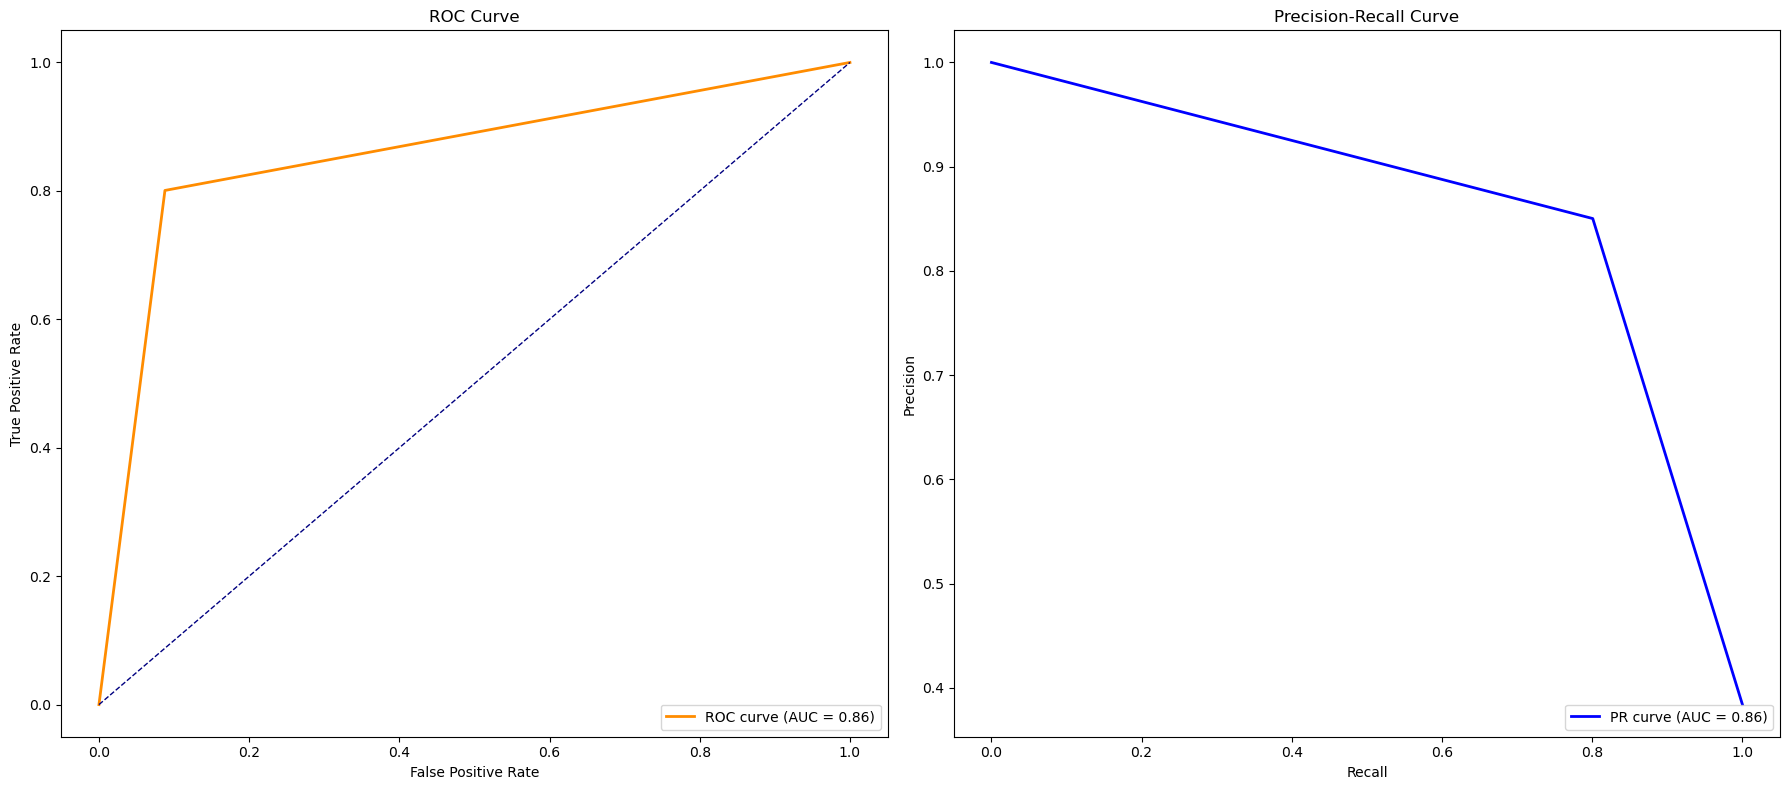

In [51]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()

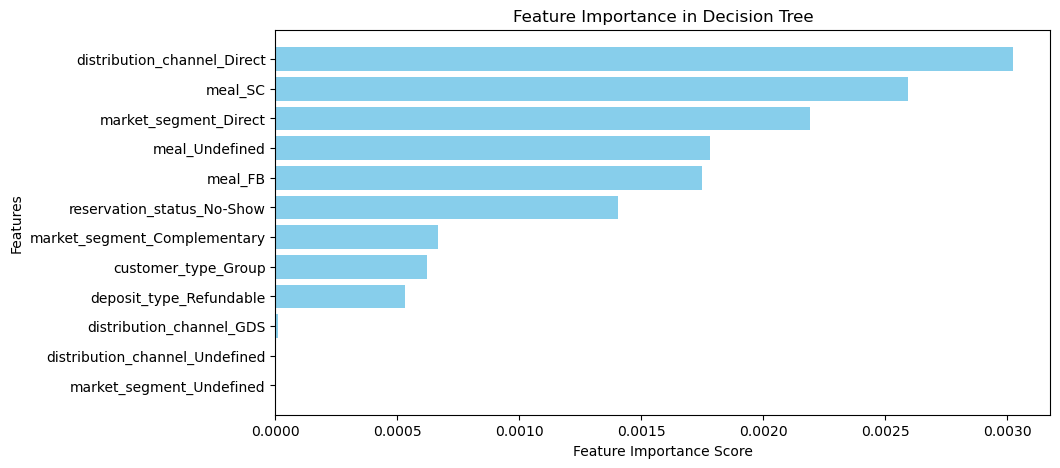

In [52]:
# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = dt_model.feature_importances_

# Convert X_train_scaled to a DataFrame if needed
feature_names = X_train.columns  # Use original DataFrame column names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[20:]

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## Random Forest 

In [53]:
rf_model = RandomForestClassifier(random_state=112)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val_scaled)

In [54]:
# Print the classification report
print('Classification Report on Training Set:')
print(classification_report(y_val, y_val_pred))

# Print the confusion matrix
print('Confusion Matrix on testing Set:')
print(confusion_matrix(y_val, y_val_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     10447
         1.0       0.93      0.90      0.91      6506

    accuracy                           0.93     16953
   macro avg       0.93      0.93      0.93     16953
weighted avg       0.93      0.93      0.93     16953

Confusion Matrix on testing Set:
[[9985  462]
 [ 670 5836]]


### Adjust threshold to improve performance

In [55]:
# Define the RandomForest Classifier model with explicit eval_metric
rfmodel = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Predict on the training set
y_test_pred = rfmodel.predict(X_val_scaled)

# Get probabilities of the positive class (churn = 1)
y_pred_probs = rfmodel.predict_proba(X_val_scaled)[:, 1]

# Set new threshold
new_threshold = 0.6 # Increase threshold to increase Precision

# Classify based on the new threshold
y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# Print updated classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_val, y_pred_adjusted))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10447
         1.0       0.94      0.87      0.91      6506

    accuracy                           0.93     16953
   macro avg       0.93      0.92      0.93     16953
weighted avg       0.93      0.93      0.93     16953

Confusion Matrix:
[[10100   347]
 [  818  5688]]


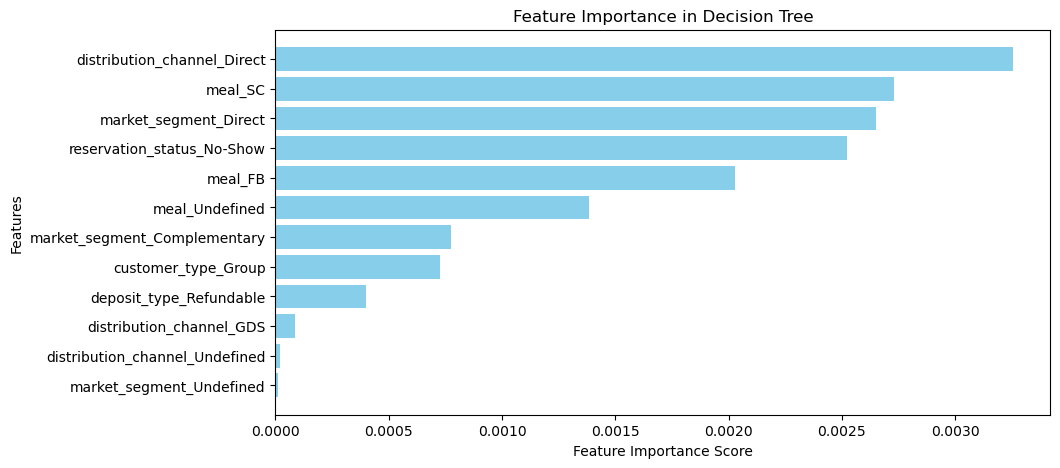

In [56]:
# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = rf_model.feature_importances_

# Convert X_train_scaled to a DataFrame if needed
feature_names = X_train.columns  # Use original DataFrame column names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[20:]

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [57]:
# Define the XGBoost Classifier model with explicit eval_metric
rfmodel = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Predict on the training set
y_test_pred = rfmodel.predict(X_test_scaled)

# Get probabilities of the positive class (churn = 1)
y_pred_probs = rfmodel.predict_proba(X_test_scaled)[:, 1]

# Set new threshold
new_threshold = 0.65 # Increase threshold to increase Precision

# Classify based on the new threshold
y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# Print updated classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     10447
         1.0       0.95      0.85      0.90      6507

    accuracy                           0.93     16954
   macro avg       0.93      0.91      0.92     16954
weighted avg       0.93      0.93      0.92     16954

Confusion Matrix:
[[10151   296]
 [  973  5534]]


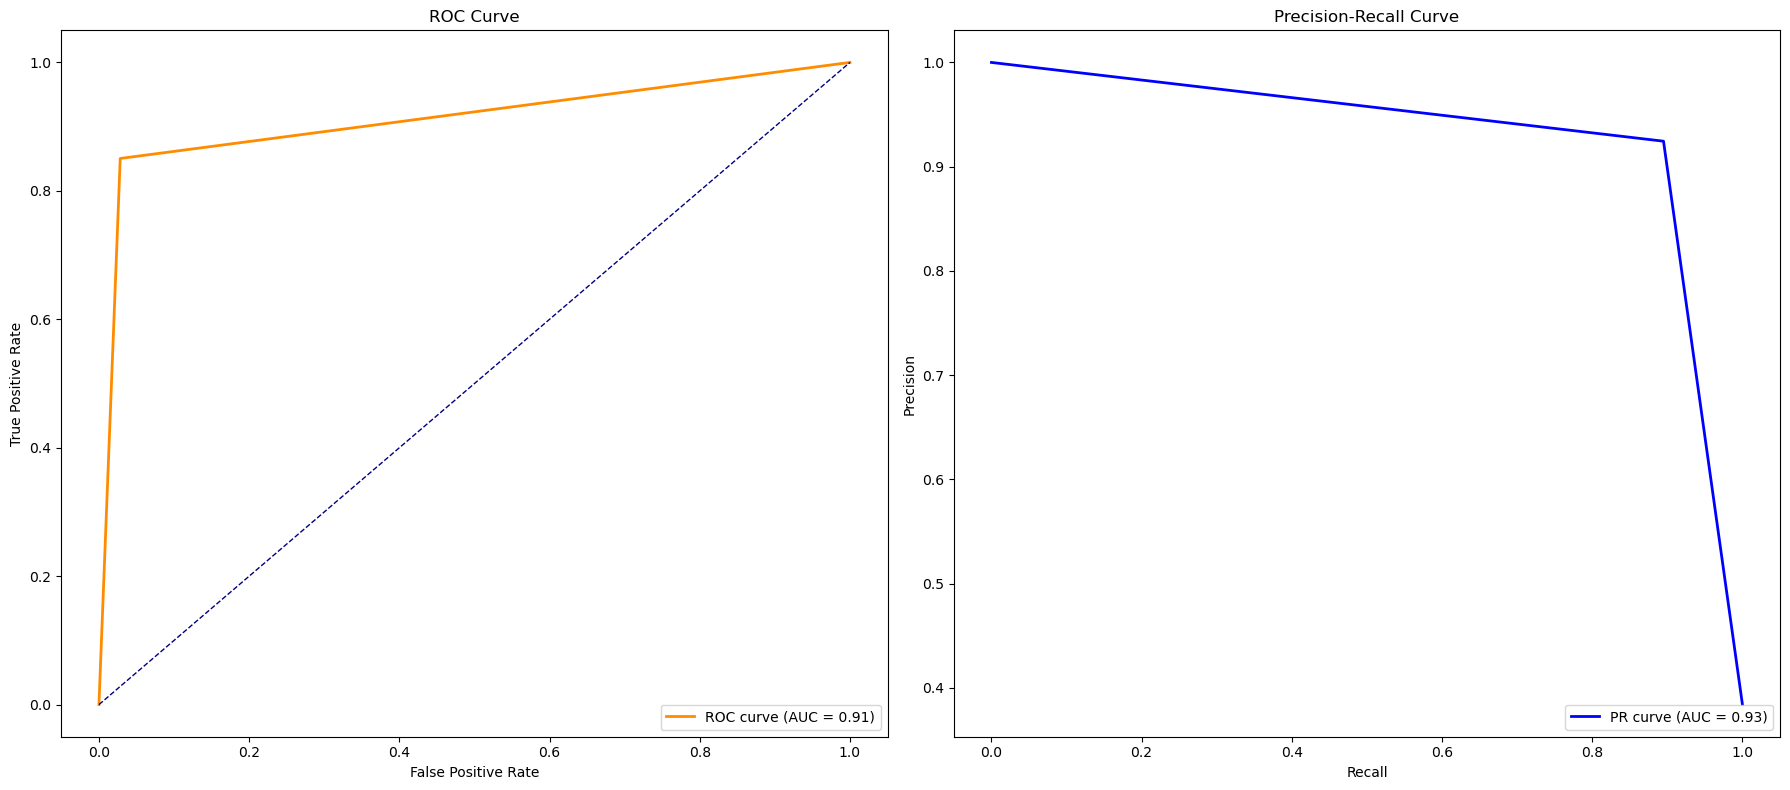

In [58]:
# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_adjusted)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Define curves and their properties
curves = [
    ("ROC Curve", fpr, tpr, "False Positive Rate", "True Positive Rate", 'darkorange', f'ROC curve (AUC = {roc_auc:.2f})'),
    ("Precision-Recall Curve", recall, precision, "Recall", "Precision", 'blue', f'PR curve (AUC = {pr_auc:.2f})')
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Loop over curves to plot
for i, (title, x, y, xlabel, ylabel, color, label) in enumerate(curves):
    axes[i].plot(x, y, color=color, lw=2, label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    axes[i].grid(False)  # Remove grid

# Add diagonal reference line for ROC Curve
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance Line')

# Adjust layout
plt.tight_layout()
plt.show()

### Observations
- Since we are concerned with the precison of class 1, Random Forest is by far the best model so far

## XGBoost 

In [59]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Define KFold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the XGBoost Classifier model
model = xgb.XGBClassifier(random_state=42)
#model = XGBClassifier()

# Perform cross-validation and calculate the f1_score
f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='f1_weighted')
print(f'Cross-validated f1 scores: {f1_scores}')
print(f'Average f1 score: {f1_scores.mean()}')

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_test_scaled)

# Print the classification report
print('Classification Report on Validation Set:')
print(classification_report(y_test, y_val_pred))

# Print the confusion matrix
print('Confusion Matrix on Validation Set:')
print(confusion_matrix(y_test, y_val_pred))

Cross-validated f1 scores: [0.92222559 0.92114242 0.92009094 0.92051547 0.92274796 0.91978932
 0.923248   0.92171956 0.92334307 0.91597576]
Average f1 score: 0.921079808982247
Classification Report on Validation Set:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     10447
         1.0       0.91      0.89      0.90      6507

    accuracy                           0.92     16954
   macro avg       0.92      0.92      0.92     16954
weighted avg       0.92      0.92      0.92     16954

Confusion Matrix on Validation Set:
[[9871  576]
 [ 725 5782]]


In [60]:
# Define the XGBoost Classifier model with explicit eval_metric
rfmodel = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Predict on the training set
y_test_pred = rfmodel.predict(X_test_scaled)

# Get probabilities of the positive class (churn = 1)
y_pred_probs = rfmodel.predict_proba(X_test_scaled)[:, 1]

# Set new threshold
new_threshold = 0.7 # Reduce threshold to increase recall

# Classify based on the new threshold
y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# Print updated classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     10447
         1.0       0.95      0.82      0.88      6507

    accuracy                           0.91     16954
   macro avg       0.92      0.90      0.91     16954
weighted avg       0.92      0.91      0.91     16954

Confusion Matrix:
[[10137   310]
 [ 1140  5367]]


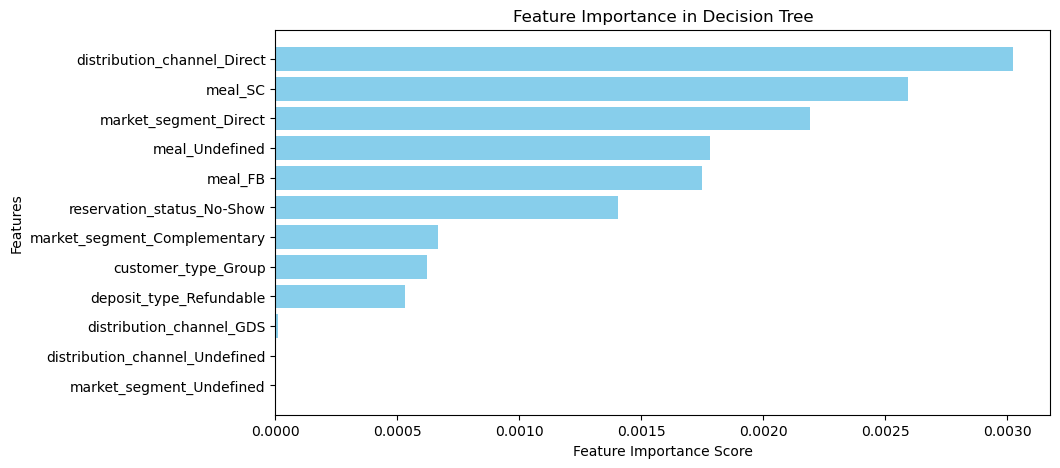

In [61]:
# Fit the model on the training data
rfmodel.fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = dt_model.feature_importances_

# Convert X_train_scaled to a DataFrame if needed
feature_names = X_train.columns  # Use original DataFrame column names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[20:]

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [62]:
# from catboost import CatBoostClassifier

# # Define the XGBoost Classifier model with explicit eval_metric
# rfmodel = CatBoostClassifier(verbose=0)
# # Fit the model on the training data
# rfmodel.fit(X_train_scaled, y_train)

# # Predict on the training set
# y_test_pred = rfmodel.predict(X_test_scaled)

# # Get probabilities of the positive class (churn = 1)
# y_pred_probs = rfmodel.predict_proba(X_test_scaled)[:, 1]

# # Set new threshold
# new_threshold = 0.55 # Reduce threshold to increase recall

# # Classify based on the new threshold
# y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# # Print updated classification report
# print("Classification Report with Adjusted Threshold:")
# print(classification_report(y_test, y_pred_adjusted))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_adjusted))

In [63]:
# # Define the XGBoost Classifier model with explicit eval_metric
# rfmodel = CatBoostClassifier(verbose=0)
# # Fit the model on the training data
# rfmodel.fit(X_train_scaled, y_train)

# # Predict on the training set
# y_test_pred = rfmodel.predict(X_test_scaled)

# # Get probabilities of the positive class (churn = 1)
# y_pred_probs = rfmodel.predict_proba(X_test_scaled)[:, 1]

# # Set new threshold
# new_threshold = 0.6 # Reduce threshold to increase recall

# # Classify based on the new threshold
# y_pred_adjusted = (y_pred_probs >= new_threshold).astype(int)


# # Print updated classification report
# print("Classification Report with Adjusted Threshold:")
# print(classification_report(y_test, y_pred_adjusted))

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_adjusted))